<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fjeahyuk/jeahyuk/least_squares_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 잔차제곱법을 실제로 계산한 것과 seaborn의 그래프를 비교해보기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'

In [ ]:
!kaggle datasets download -d aungpyaeap/fish-market
!unzip '*.zip'

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 3.89MB/s]
Archive:  fish-market.zip
  inflating: Fish.csv                


In [ ]:
!ls

Fish.csv  fish-market.zip  sample_data


In [ ]:
df = pd.read_csv('Fish.csv')

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Text(0.5, 0.98, 'fish market Species:Bream')

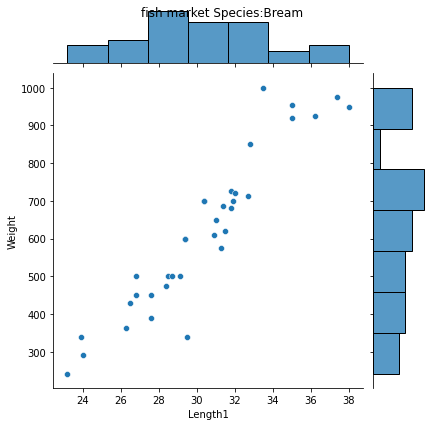

In [ ]:
sns.jointplot(data=df[(df['Species']=='Bream')], x='Length1', y='Weight')
plt.suptitle("fish market Species:Bream")

Text(0.5, 0.98, 'fish market Species:Bream')

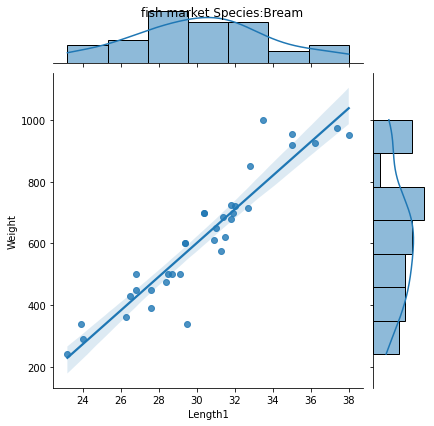

In [ ]:
sns.jointplot(data=df[(df['Species']=='Bream')], x='Length1', y='Weight',kind='reg')
plt.suptitle("fish market Species:Bream")

# 잔차제곱 정규방정식으로 계산

In [ ]:
df_b=df[(df['Species']=='Bream')]

df_b_w:M  
df_b_l:y  
df_b_l_t:M^T  
m_mt_r:(MM^T)^{-1}

In [ ]:
df_b_w=df_b["Weight"]
df_b_l=df_b["Length1"]
df_b_l1=df_b["Length1"]
df_b_l2=df_b_l1/df_b_l
df_b_l=pd.concat([df_b_l2,df_b_l],axis=1)
#df_b_w=y
#df_b_l=M

In [ ]:
#df_b_l_t : M^t
df_b_l_t=df_b_l.transpose()
df_b_l_t

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
Length1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Length1,23.2,24.0,23.9,26.3,26.5,26.8,26.8,27.6,27.6,28.5,...,31.8,32.0,32.7,32.8,33.5,35.0,35.0,36.2,37.4,38.0


In [ ]:
m_mt=df_b_l_t@df_b_l
m_mt_r=np.linalg.inv(m_mt)
index_name=['Length1','Length1']
column_name=['Length1','Length1']
m_mt_r=pd.DataFrame(m_mt_r,index=index_name,columns=column_name)

m_mt_r

,Length1,Length1
Length1,2.120210,-0.069018
Length1,-0.069018,0.002277


In [ ]:
m_mt_r1=m_mt-m_mt

$v^*=(M^TM)^{-1}M^Ty$

In [ ]:
#m_mt_r=(M^t*M)^-1
v1=m_mt_r@df_b_l_t
v=v1@df_b_w
v
#

Length1   -1035.347565
Length1      54.549981
dtype: float64

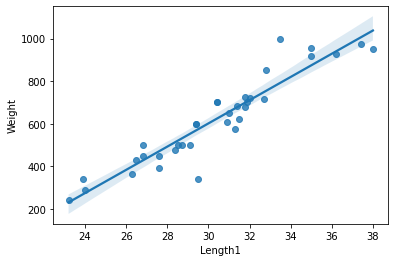

In [ ]:
sns.regplot(x='Length1', y='Weight',data=df[(df['Species']=='Bream')])

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X,lr.predict(X.values.reshape(-1,1)))
plt.show()

# 두 그래프 비교 
매우 비슷함

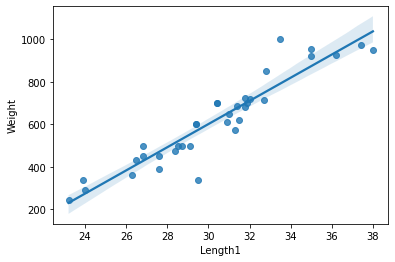

In [ ]:
sns.regplot(x='Length1', y='Weight',data=df[(df['Species']=='Bream')])

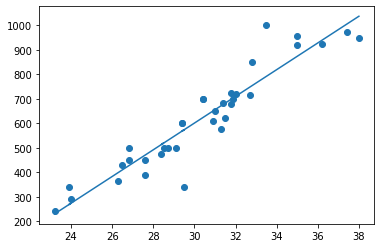

In [ ]:
data=df[(df['Species']=='Bream')]
y=data['Weight']
x=data['Length1']
plt.scatter(x,y)
plt.plot(x, 54.549981*x  -1035.347565)